## SpaRED Library Plotting DEMO
This demo demostrate how to use the plotting functions available in our SpaRED PyPI library.

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as im
import os
import sys
from pathlib import Path

currentdir = os.getcwd()
parentdir = str(Path(currentdir).parents[2])
sys.path.insert(0, parentdir)

import spared

### Load Datasets
The `datasets` file has a function to get any desired dataset and return the adata as well as the parameter dictionary. This function returns a filtered and processed adata. This function has a parameter called *visualize* that allows for all visualizations if set to True. The fuction also saves the raw_adata (not processed) in case it is required. 

We will begin by loading a dataset and setting the *visualize* parameter as False. This way we can look at each plotting function separetetly as evaluate the generated images. 

In [17]:
from spared.datasets import get_dataset
import anndata as ad

#get_dataset(dataset, visualize)
data = get_dataset("vicari_mouse_brain", visualize=False)

#adata
adata = data.adata

#parameters dictionary
param_dict = data.param_dict

#loading raw adata 
dataset_path = "/home/dvegaa/spared/spared/processed_data/villacampa_data/villacampa_lung_organoid/2024-05-30-13-08-21"
raw_adata = ad.read_h5ad(os.path.join(dataset_path, f'adata_raw.h5ad'))

Loading vicari_mouse_brain dataset with the following data split:
train data: ['V11L12-038_A1', 'V11L12-038_B1', 'V11L12-038_C1', 'V11L12-038_D1', 'V11L12-109_A1', 'V11L12-109_B1', 'V11L12-109_C1', 'V11L12-109_D1']
val data: ['V11T16-085_A1', 'V11T16-085_B1', 'V11T16-085_C1', 'V11T16-085_D1']
test data: ['V11T17-101_A1', 'V11T17-101_B1']
Parameters already saved in /media/SSD4/dvegaa/spared/spared/processed_data/vicari_data/vicari_mouse_brain/2024-06-13-16-36-13/parameters.json
Loading main adata file from disk (/media/SSD4/dvegaa/spared/spared/processed_data/vicari_data/vicari_mouse_brain/2024-06-13-16-36-13/adata.h5ad)...
The loaded adata object looks like this:
AnnData object with n_obs × n_vars = 43804 × 128
    obs: 'in_tissue', 'array_row', 'array_col', 'patient', 'slide_id', 'split', 'unique_id', 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'gene_symbol', 'exp_frac', 'glob_exp_frac', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_count

### Load Datasets

We are ready to explore the plotting function one by one. This tutorial will demostrate how to use each function, what to introduce as input and the expected output. First we must define a path to where the plots will be saved.


In [13]:
inv_folder_path="/home/dvegaa/spared/docs/inv_plots/vicari_mouse_brain"
os.makedirs(inv_folder_path, exist_ok=True)

`plot_data_distribution_stats` receives as input:

* **dataset (str):** name of the dataset
* **processed_adata (ad.AnnData):** processed adata 
* **path (str):** path to where image will be saved

And plots a pie chart and bar plots of the distribution of spots and slides in the dataset split.

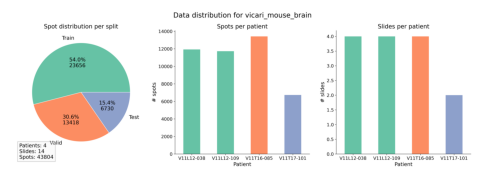

In [34]:
from spared.plotting import plot_data_distribution_stats

plot_data_distribution_stats(dataset=data.dataset, processed_adata=adata, path=os.path.join(inv_folder_path, 'splits_stats.png'))

# Load the saved image
image_path = os.path.join(inv_folder_path, 'splits_stats.png')
img = im.imread(image_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

Now lets begin with `plot_all_slides`. This function receives as input:
* **dataset (str):** name of the dataset
* **processed_adata (ad.AnnData):** processed adata
* **path (str):** path to where image will be saved

And plots all the whole slide images present in the dataset.

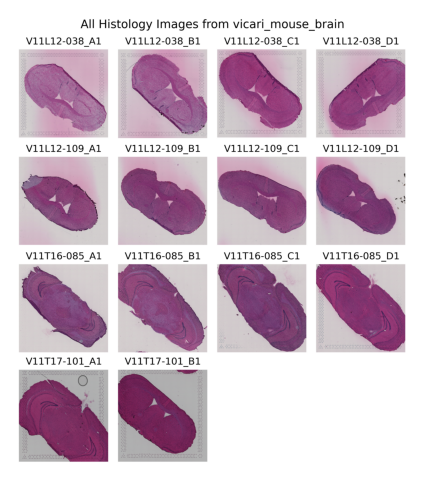

In [16]:
from spared.plotting import plot_all_slides

plot_all_slides(dataset=data.dataset, processed_adata=adata, path=os.path.join(inv_folder_path, 'all_slides.png'))

# Load the saved image
image_path = os.path.join(inv_folder_path, 'all_slides.png')
img = im.imread(image_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()


`plot_exp_frac` receives as input:

* **param:dict (dict):** dictionary of dataset parameters
* **dataset (str):** name of the dataset
* **raw_adata (ad.AnnData):** raw adata 
* **path (str):** path to where image will be saved

And plots a heatmap of the expression fraction and global expression fraction for the complete collection of slides. 

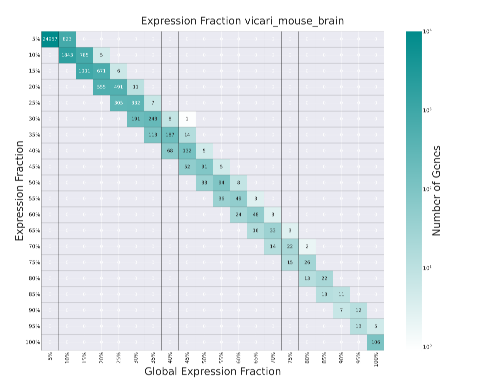

In [21]:
from spared.plotting import plot_exp_frac

plot_exp_frac(param_dict=param_dict, dataset=data.dataset, raw_adata=raw_adata, path=os.path.join(inv_folder_path, 'exp_frac.png'))

# Load the saved image
image_path = os.path.join(inv_folder_path, 'exp_frac.png')
img = im.imread(image_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

`plot_histograms` receives as input:

* **processed_adata (ad.AnnData):** raw adata 
* **raw_adata (ad.AnnData):** processed adata 
* **path (str):** path to where image will be saved

And plots a figure that analyses the effect of the filtering over the data.The first row corresponds to the raw data and the second row plots the filtered and processed data. Histograms of total:   
1. Counts per cell
2. Cells with expression
3. Total counts per gene
4. Moran I statistics (only in processed data)

are generated.

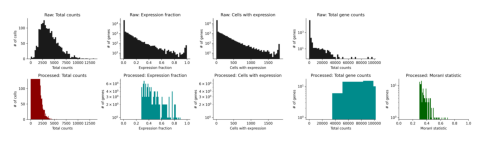

In [24]:
from spared.plotting import plot_histograms

plot_histograms(processed_adata=data.adata, raw_adata=raw_adata, path=os.path.join(inv_folder_path, 'filtering_histograms.png'))

# Load the saved image
image_path = os.path.join(inv_folder_path, 'filtering_histograms.png')
img = im.imread(image_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

`plot_random_patches` receives as input:

* **dataset(str):** name of the dataset
* **processed_adata (ad.AnnData):** processed adata 
* **path (str):** path to where image will be saved
* **patch_size:** the size of the patches

And plots 16 random patches.

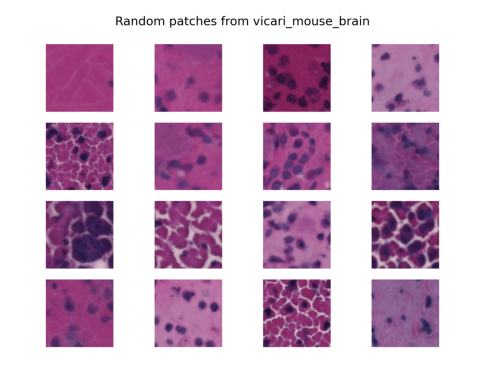

In [26]:
from spared.plotting import plot_random_patches

plot_random_patches(dataset=data.dataset, processed_adata=adata, path=os.path.join(inv_folder_path, 'random_patches.png'), patch_size=data.patch_size)

# Load the saved image
image_path = os.path.join(inv_folder_path, 'random_patches.png')
img = im.imread(image_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

`visualize_moran_filtering` receives as input:

* **param dict (dict):** dictionary of dataset parameters
* **processed_adata (ad.AnnData):** processed adata 
* **from_layer (str):** layer used for plotting
* **path (str):** path to where image will be saved
* **split_names (dict):** dictionary containing split names
* **top (bool):** if True the top most auto-correlated genes are visualized. If False the top least auto-correlated genes are visualized.

And plots the most or least auto-correlated genes.

Plotting slides were None or missing in the dataset. And there are more than 4 slides. Setting slides internally from all splits: V11L12-109_C1,V11T16-085_A1,V11T17-101_A1,V11L12-038_D1


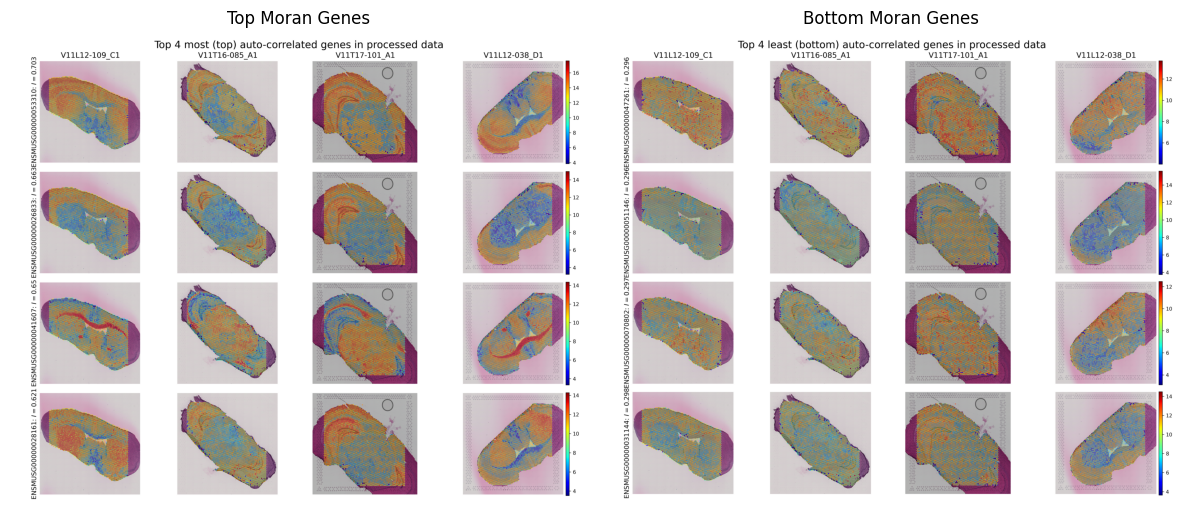

In [27]:
# Creat folder for top and bottom moran genes
os.makedirs(os.path.join(inv_folder_path, 'top_moran_genes'), exist_ok=True)
os.makedirs(os.path.join(inv_folder_path, 'bottom_moran_genes'), exist_ok=True)
# Define the layer
layer = 'c_d_log1p'

from spared.plotting import visualize_moran_filtering

visualize_moran_filtering(param_dict=param_dict, processed_adata=adata, from_layer=layer, path=os.path.join(inv_folder_path, 'top_moran_genes', f'{layer}.png'), split_names=data.split_names, top = True)
visualize_moran_filtering(param_dict=param_dict, processed_adata=adata, from_layer=layer, path = os.path.join(inv_folder_path, 'bottom_moran_genes', f'{layer}.png'), split_names=data.split_names, top = False)

# Load the saved image
image_path_top = os.path.join(inv_folder_path, 'top_moran_genes', f'{layer}.png')
img_top = im.imread(image_path_top)

image_path_bot = os.path.join(inv_folder_path, 'bottom_moran_genes', f'{layer}.png')
img_bot = im.imread(image_path_bot)

# Display the image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(img_top)
ax[0].axis('off')
ax[0].set_title('Top Moran Genes')

ax[1].imshow(img_bot)
ax[1].axis('off')
ax[1].set_title('Bottom Moran Genes')

plt.tight_layout()
plt.show()


`visualize_gene_expression` receives as input:

* **param dict (dict):** dictionary of dataset parameters
* **processed_adata (ad.AnnData):** processed adata 
* **from_layer (str):** layer used for plotting (must be *raw* values)
* **path (str):** path to where image will be saved
* **split_names (dict):** dictionary containing split names

And plots the gene expression of 4 specified genes in `param_dict['plotting_genes']`. If in `param_dict['plotting_genes'] = None`, 4 genes are randomly selected. 

Could not find all the specified plotting genes, choosing randomly


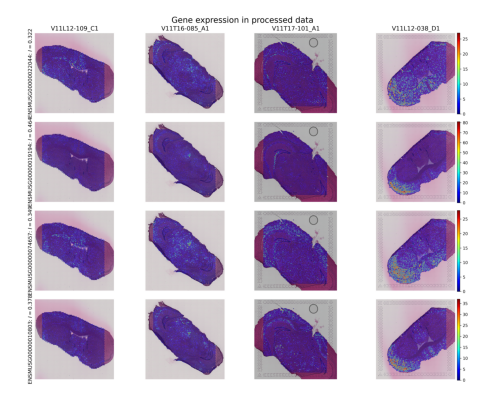

In [29]:
# creat folder for expression plots
os.makedirs(os.path.join(inv_folder_path, 'expression_plots'), exist_ok=True)
# Define the layer
layer = 'counts'

from spared.plotting import visualize_gene_expression

visualize_gene_expression(param_dict=param_dict, processed_adata=adata, from_layer=layer, path=os.path.join(inv_folder_path,'expression_plots', f'{layer}.png'), split_names=data.split_names)

# Load the saved image
image_path = os.path.join(inv_folder_path,'expression_plots', f'{layer}.png')
img = im.imread(image_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

`plot_clusters` receives as input:

* **dataset (str):** name of the dataset
* **param dict (dict):** dictionary of dataset parameters
* **processed_adata (ad.AnnData):** processed adata 
* **from_layer (str):** layer used for plotting 
* **path (str):** path to where image will be saved
* **split_names (dict):** dictionary containing split names

And generates a plot that visualizes the Leiden clusters spatially in the slides. More specifically, it plots:
1. The spatial distribution of the Leiden clusters in the slides.
2. UMAP embeddings of each slide colored by Leiden clusters.
3. General UMAP embedding of the complete dataset colored by Leiden clusters and the batch correction key.
4. PCA embeddings of the complete dataset colored by the batch correction key.

/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


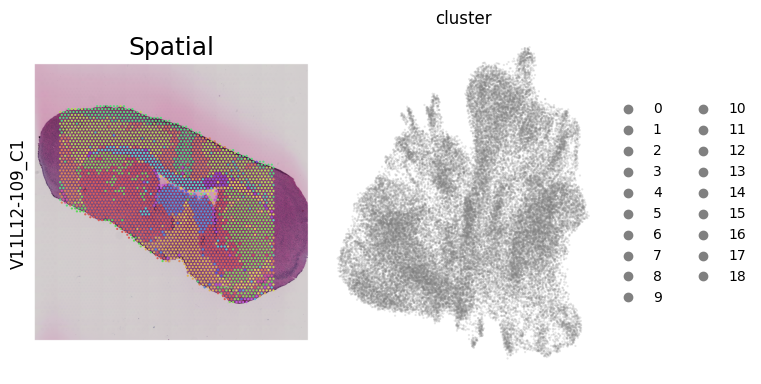

/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided 

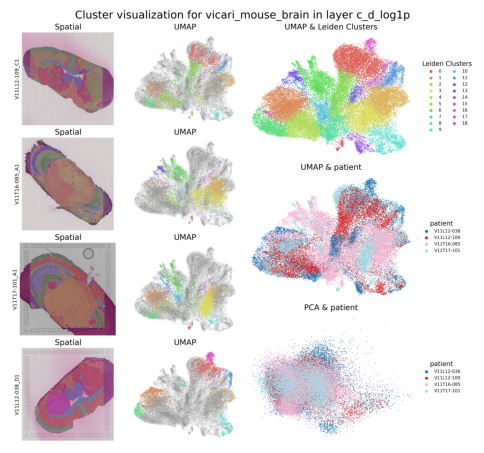

In [30]:
# Create folder to save cluster plots
os.makedirs(os.path.join(inv_folder_path, 'cluster_plots'), exist_ok=True)
# Define layer
layer = 'c_d_log1p'

from spared.plotting import plot_clusters

plot_clusters(dataset=data.dataset, param_dict=param_dict, processed_adata=adata, from_layer=layer, path=os.path.join(inv_folder_path, 'cluster_plots', f'{layer}.png'), split_names=data.split_names)

# Load the saved image
image_path = os.path.join(inv_folder_path, 'cluster_plots', f'{layer}.png')
img = im.imread(image_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()


`plot_mean_std` receives as input:

* **dataset (str):** name of the dataset
* **processed_adata (ad.AnnData):** processed adata 
* **raw_adata (ad.AnnData):** raw adata
* **path (str):** path to where image will be saved

And plots a scatter of mean and standard deviation of genes present in raw_adata (black) and all the layers with non-zero mean in processed_adata. This function can be used to see the effect of filtering and processing in the genes.

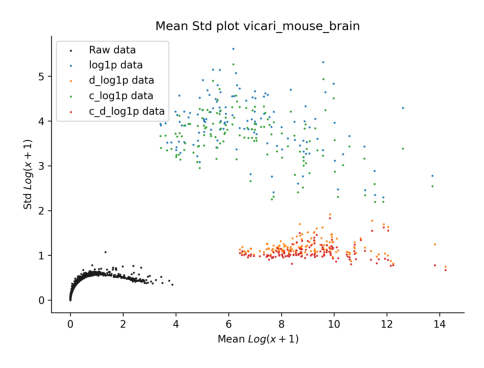

In [31]:
from spared.plotting import plot_mean_std

plot_mean_std(dataset=data.dataset, processed_adata=adata, raw_adata=raw_adata, path=os.path.join(inv_folder_path, 'mean_std_scatter.png'))

# Load the saved image
image_path = os.path.join(inv_folder_path, 'mean_std_scatter.png')
img = im.imread(image_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

`plot_mean_std_partitions` receives as input:

* **dataset (str):** name of the dataset
* **processed_adata (ad.AnnData):** processed adata 
* **from_layer (str):** layer used for plotting
* **path (str):** path to where image will be saved

And plots a scatter of mean and standard deviation of genes present in processed_adata drawing with a different color different data splits. This function is used to see how tractable is the task.

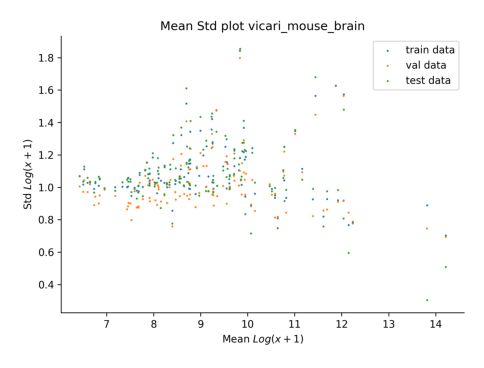

In [35]:
# Create folder to save mean and std partition plots
os.makedirs(os.path.join(inv_folder_path, 'mean_vs_std_partitions'), exist_ok=True)
# Define layer
layer = 'c_d_log1p'

from spared.plotting import plot_mean_std_partitions

plot_mean_std_partitions(dataset=data.dataset, processed_adata=adata, from_layer=layer, path=os.path.join(inv_folder_path, 'mean_vs_std_partitions', f'{layer}.png'))

# Load the saved image
image_path = os.path.join(inv_folder_path, 'mean_vs_std_partitions', f'{layer}.png')
img = im.imread(image_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

`plot_tests` receives as input:

* **patch_size (int):** size of the patches
* **dataset (str):** name of the dataset
* **split_names (dict):** dictionary containing split names
* **param_dict (dict):** dictionary of dataset parameters
* **folder_path (str):** path to the folder where all the images will be saved
* **processed_adata (ad.AnnData):** processed adata 
* **raw_adata (ad.AnnData):** raw adata 

And calls all the plotting functions in the plotting library to create quality control plots.

Started quality control plotting
Plotting genes not in data. Setting random plotting genes: ENSMUSG00000015090,ENSMUSG00000022415,ENSMUSG00000015090,ENSMUSG00000033161
Started partitions mean vs std scatter plotting


100%|██████████| 3/3 [00:10<00:00,  3.45s/it]


Started all slides plotting
Started filtering histograms plotting
Started random patches plotting
Started moran filtering plotting


100%|██████████| 3/3 [01:50<00:00, 36.94s/it]


Started cluster plotting


  0%|          | 0/3 [00:00<?, ?it/s]/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


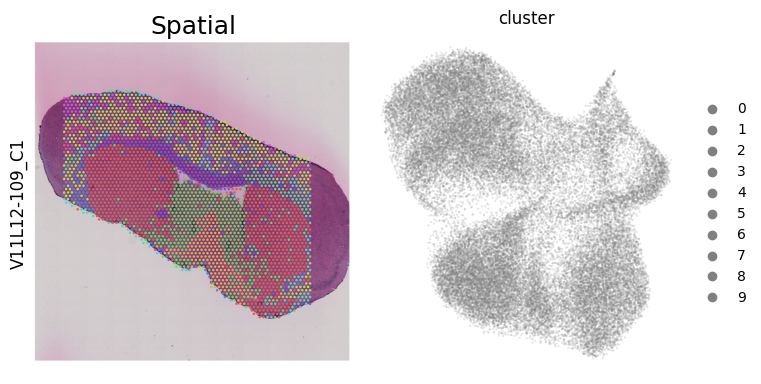

/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided 

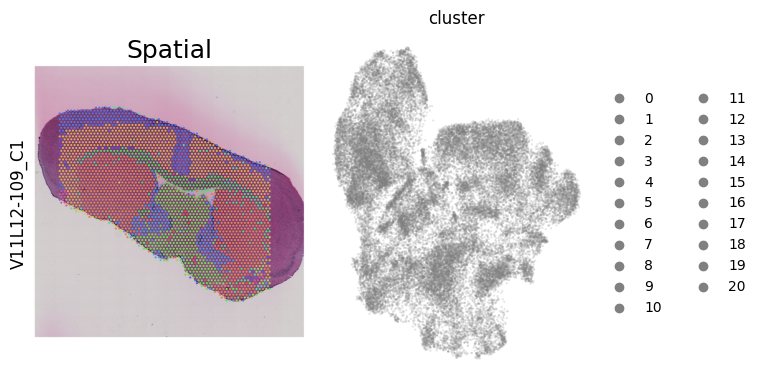

/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided 

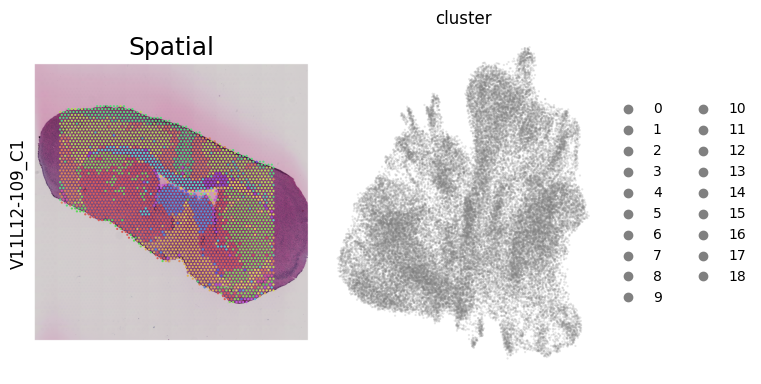

/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided 

Started gene expression plotting


100%|██████████| 5/5 [01:32<00:00, 18.59s/it]


Started mean vs std plotting
Started data distribution statistics plotting
Started expression fraction plotting
Quality control plotting took 521.14s
Images saved in /home/dvegaa/spared/docs/all_plots/vicari_mouse_brain/qc_plots


In [36]:
# Create folder to save all plots
folder_path="/home/dvegaa/spared/docs/all_plots/vicari_mouse_brain"
os.makedirs(folder_path, exist_ok=True)

from spared.plotting import plot_tests

plot_tests(patch_size=data.patch_size, dataset=data.dataset, split_names=data.split_names, param_dict=param_dict, folder_path=folder_path, processed_adata=adata, raw_adata=raw_adata)
